# Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/Shareddrives/CS534/

/content/drive/Shareddrives/CS534


In [ ]:
%pwd

'/content/drive/Shareddrives/CS534'

In [ ]:
!ls

convnet_from_scratch.keras  model.png	     my_model_gray.h5
edge_detect		    my_model_1.h5    ready_to_train
lung_colon_image_set	    my_model_aug.h5  split_data


### Copy data from Google drive to Colab drive

In [ ]:
import os, shutil, pathlib
shutil.copytree("/content/drive/Shareddrives/CS534/split_data","/content/data")

'/content/data'

In [ ]:
shutil.copytree("/content/drive/Shareddrives/CS534/lung_colon_image_set","/content/raw_data")

'/content/raw_data'

In [ ]:
# copy data with edge detection
shutil.copytree("/content/drive/Shareddrives/CS534/edge_detect/train","/content/edge")

'/content/edge'

# Import packages

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Split train test val data

In [ ]:
original_dir = pathlib.Path("lung_colon_image_set")
new_base_dir = pathlib.Path("ready_to_train")

In [ ]:
fname_dic ={"colon_aca": "colonca", "colon_n" : "colonn", "lung_aca":"lungaca", "lung_n":"lungn", "lung_scc":"lungscc"}

!ls '.'

def make_subset(subset_name, start_index, end_index):
  for category in ("colon_aca", "colon_n", "lung_aca", "lung_n", "lung_scc"):
    print(category)
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    for i in range(start_index, end_index):
      if i in [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]:
        print(i)
      fname = f"{fname_dic[category]}{i}.jpeg"
      shutil.copyfile(src=original_dir/ category / fname,  dst=dir / fname)

convnet_from_scratch.keras  fine_tuning.keras	  my_model_aug.h5   split_data
DenseNet121.h5		    lung_colon_image_set  my_model_gray.h5  vgg16.h5
edge_detect		    model.png		  ready_to_train    vgg19.h5
efficientb7.h5		    my_model_1.h5	  ResNet50.h5


# Data visualization

In [ ]:
original_train = os.listdir(new_base_dir / "train")
print(original_train)

num = []
for key in original_train:
  num.append(len(os.listdir(new_base_dir / "train" /key)))

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']


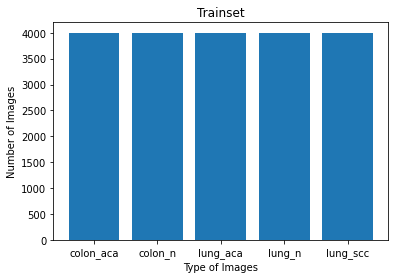

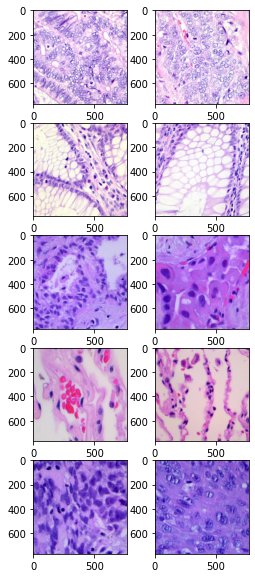

In [ ]:
plt.ylabel('Number of Images')
plt.xlabel('Type of Images')
plt.title('Trainset')
plt.bar(original_train, num)

fig, axs = plt.subplots(5, 2, figsize=(4,10))
for i in range(0, len(original_train)):
  path0 = os.listdir(new_base_dir / "train" /original_train[i])[0]
  path1 = os.listdir(new_base_dir / "train" /original_train[i])[3000]
  axs[i, 0].imshow(plt.imread(new_base_dir / "train" /original_train[i] /path0))
  axs[i, 1].imshow(plt.imread(new_base_dir / "train" /original_train[i] /path1))

In [ ]:
original_val = os.listdir(new_base_dir / "validation")
print(original_val)

num = []
for key in original_val:
  num.append(len(os.listdir(new_base_dir / "validation" /key)))

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']


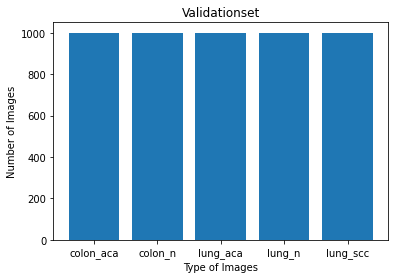

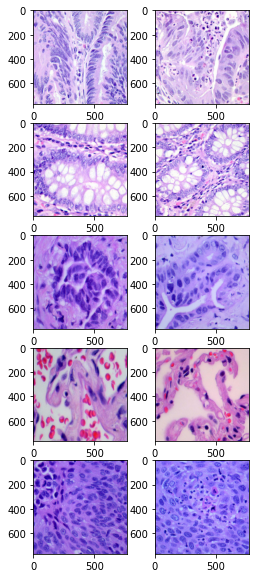

In [ ]:
plt.ylabel('Number of Images')
plt.xlabel('Type of Images')
plt.title('Validationset')
plt.bar(original_val, num)

fig, axs = plt.subplots(5, 2, figsize=(4,10))
for i in range(0, len(original_val)):
  path0 = os.listdir(new_base_dir / "validation" /original_val[i])[0]
  path1 = os.listdir(new_base_dir / "validation" /original_val[i])[300]
  axs[i, 0].imshow(plt.imread(new_base_dir / "validation" /original_val[i] /path0))
  axs[i, 1].imshow(plt.imread(new_base_dir / "validation" /original_val[i] /path1))

# HOG

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import feature as ft

In [ ]:
img = cv2.imread('/content/data/train/colon_aca/colonca1.jpeg', cv2.IMREAD_COLOR)
features = ft.hog(img,orientations=6,pixels_per_cell=[20,20],cells_per_block=[2,2],visualize=True)
plt.imshow(features[1])
plt.show()

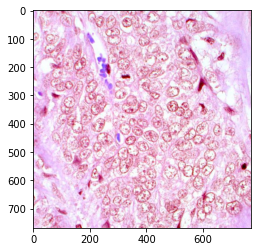

In [ ]:
plt.imshow(img)
plt.show()

# edge detection

In [ ]:
def sobel(img, path):

  sobelX = cv2.Sobel(img,cv2.CV_64F,1,0)#x方向的梯度
  sobelY = cv2.Sobel(img,cv2.CV_64F,0,1)#y方向的梯度

  sobelX = np.uint8(np.absolute(sobelX))#x方向梯度的绝对值
  sobelY = np.uint8(np.absolute(sobelY))#y方向梯度的绝对值

  sobelCombined = cv2.bitwise_or(sobelX,sobelY)#
  cv2.imwrite(path, sobelCombined)
  # plt.imshow(sobelCombined)

In [ ]:
fname_dic ={"colon_aca": "colonca", "colon_n" : "colonn", "lung_aca":"lungaca", "lung_n":"lungn", "lung_scc":"lungscc"}

def edge_detect(subset_name):
  for category in ("colon_aca", "colon_n", "lung_aca", "lung_n", "lung_scc"):
    print(category)
    dir = '/content/edge_detect/'+subset_name+ '/' + category
    os.makedirs(dir)
    old_dir = '/content/data/'+subset_name+ '/' + category
    filenames=os.listdir(old_dir)
    for i in filenames:
      img = cv2.imread(old_dir+'/'+i, cv2.IMREAD_COLOR)
      sobel(img, dir+'/'+i)

In [ ]:
edge_detect('train')

colon_aca
colon_n
lung_aca
lung_n
lung_scc


In [ ]:
edge_detect('validation')

colon_aca
colon_n
lung_aca
lung_n
lung_scc


In [ ]:
edge_detect('test')

colon_aca
colon_n
lung_aca
lung_n
lung_scc


In [ ]:
shutil.copytree("/content/edge_detect","/content/drive/Shareddrives/CS534/edge_detect")

'/content/drive/Shareddrives/CS534/edge_detect'

# Read train and val data

In [ ]:
data_dir = '/content/raw_data/'

size = 128

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255, validation_split = 0.25)

train_dataset = datagen.flow_from_directory(data_dir,
                       class_mode = "categorical",
                       target_size = (size,size),
                       color_mode="rgb",
                       batch_size = 32,
                       shuffle = False,
                       subset='training',
                       seed = 42)

validation_dataset = datagen.flow_from_directory(data_dir,
                         class_mode = "categorical",
                         target_size = (size, size),
                         color_mode="rgb",
                         batch_size = 12,
                         shuffle = False,
                         subset='validation',
                         seed = 42)

Found 18750 images belonging to 5 classes.
Found 6250 images belonging to 5 classes.


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)
test_dataset = test_datagen.flow_from_directory("/content/drive/Shareddrives/CS534/split_data/test",
                          subset=None,
                          target_size=(size,size),
                          batch_size=32,
                          color_mode='rgb',
                          class_mode='categorical',
                          shuffle=False)

Found 2500 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'colon_aca': 0, 'colon_n': 1, 'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}

# Build Model

In [ ]:
from threading import active_count
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
inputs = keras.Input(shape=(128, 128, 1))
x = layers.Conv2D(filters=32, kernel_size=2, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=2, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = Dense(128, activation = 'softmax')(x)
x = Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 127, 127, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 31, 31, 128)       8320  

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

/device:GPU:0


In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset,
    callbacks=[early_stopping])

Epoch 1/15


NotFoundError: ignored

In [ ]:
# model.save('my_model_1.h5')

In [ ]:
# model.save('my_model_aug.h5')

In [ ]:
model.save('my_model_gray.h5')

# Model Evaluation

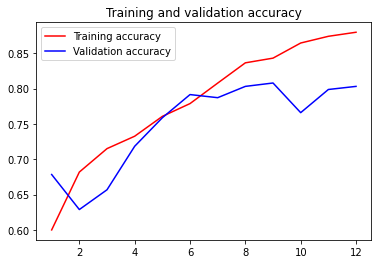

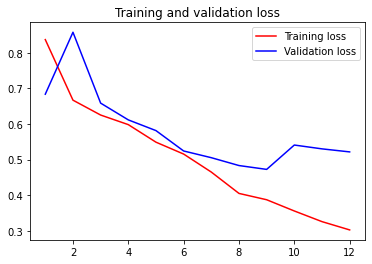

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

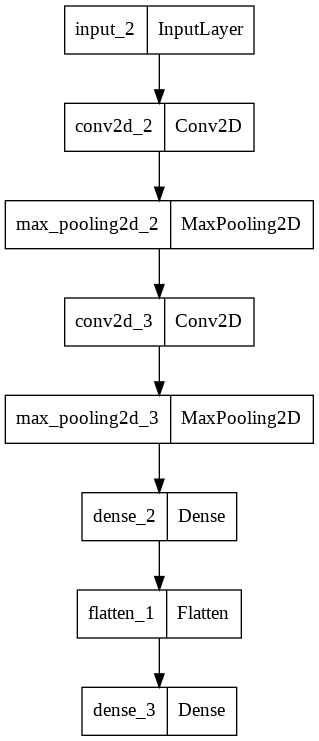

In [ ]:
new_model = tf.keras.models.load_model('my_model_gray.h5')
keras.utils.plot_model(
    new_model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
Y_pred = new_model.predict(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)
print(test_dataset.classes)
print(y_pred)
# test_loss, test_acc = model.evaluate(val_dataset)
# print(f"Test accuracy: {test_acc:.3f}")

79/79 [==============================] - 22s 275ms/step
[0 0 0 ... 4 4 4]
[0 1 1 ... 4 4 4]


In [ ]:
print(classification_report(test_dataset.classes, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       500
           1       0.82      0.99      0.90       500
           2       0.95      0.74      0.83       500
           3       1.00      0.99      0.99       500
           4       0.79      0.98      0.87       500

    accuracy                           0.89      2500
   macro avg       0.91      0.89      0.89      2500
weighted avg       0.91      0.89      0.89      2500



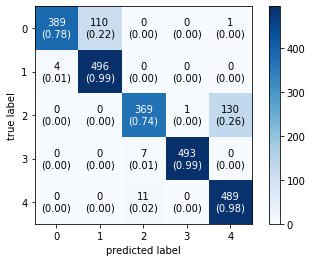

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(test_dataset.classes, y_pred)
plot_confusion_matrix(
    conf_mat=cm1,
    show_absolute=True,
    show_normed=True,
    colorbar=True)
plt.show()

# Pretrained

## EfficientNetB7

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7  as PretrainedModel, preprocess_input

In [ ]:
ptm = PretrainedModel(
    input_shape=(size, size, 3),
    weights='imagenet',
    include_top=False)

ptm.trainable = False

x = GlobalAveragePooling2D()(ptm.output)
x = Flatten()(x)

outputs = Dense(5, activation='softmax')(x)

model = keras.Model(inputs=ptm.input, outputs=outputs)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=2,
    callbacks=[early_stopping])

Epoch 1/2
586/586 [==============================] - 215s 336ms/step - loss: 2.2149 - accuracy: 0.1924 - val_loss: 2.6149 - val_accuracy: 0.2000
Epoch 2/2
586/586 [==============================] - 192s 328ms/step - loss: 2.2606 - accuracy: 0.1804 - val_loss: 1.8937 - val_accuracy: 0.2000


In [ ]:
model.save("efficientb7.h5")

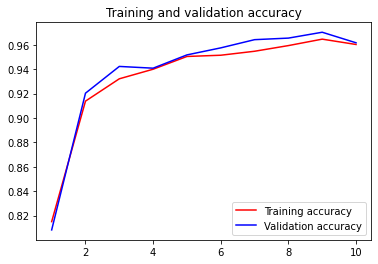

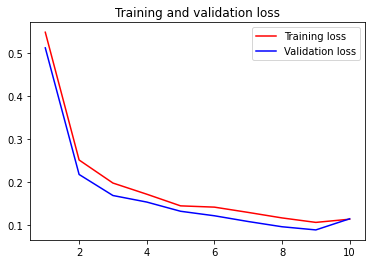

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## VGG16

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(size, size, 3))

In [ ]:
conv_base.trainable = False

In [ ]:
x = layers.Flatten()(conv_base.output)
x = layers.Dense(256)(x)
x = layers.Dense(128)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(conv_base.input, outputs)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stopping])

Epoch 1/20
586/586 [==============================] - 189s 322ms/step - loss: 18.5122 - accuracy: 0.8943 - val_loss: 2.9279 - val_accuracy: 0.9138
Epoch 2/20
586/586 [==============================] - 188s 321ms/step - loss: 2.6281 - accuracy: 0.9397 - val_loss: 0.5823 - val_accuracy: 0.9666
Epoch 3/20
586/586 [==============================] - 188s 322ms/step - loss: 17.2788 - accuracy: 0.9192 - val_loss: 60.2230 - val_accuracy: 0.8158
Epoch 4/20
586/586 [==============================] - 190s 325ms/step - loss: 8.3753 - accuracy: 0.9599 - val_loss: 2.2693 - val_accuracy: 0.9672
Epoch 5/20
586/586 [==============================] - 188s 322ms/step - loss: 0.7163 - accuracy: 0.9806 - val_loss: 2.6411 - val_accuracy: 0.9347


In [ ]:
model.save('vgg16.h5')

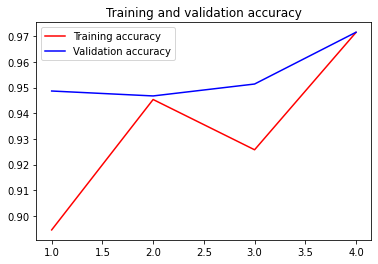

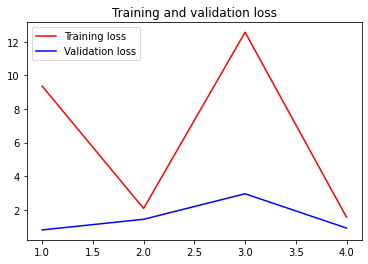

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## VGG19

In [ ]:
conv_base = keras.applications.vgg19.VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(size, size, 3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
conv_base.trainable = False

In [ ]:
x = layers.Flatten()(conv_base.output)
x = layers.Dense(256)(x)
x = layers.Dense(128)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(conv_base.input, outputs)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stopping])

Epoch 1/20
586/586 [==============================] - 189s 322ms/step - loss: 8.7341 - accuracy: 0.8857 - val_loss: 0.6468 - val_accuracy: 0.9459
Epoch 2/20
586/586 [==============================] - 190s 324ms/step - loss: 8.0562 - accuracy: 0.9030 - val_loss: 1.0546 - val_accuracy: 0.9602
Epoch 3/20
586/586 [==============================] - 190s 324ms/step - loss: 0.6359 - accuracy: 0.9599 - val_loss: 0.7779 - val_accuracy: 0.9546
Epoch 4/20
586/586 [==============================] - 189s 322ms/step - loss: 0.7178 - accuracy: 0.9610 - val_loss: 1.0640 - val_accuracy: 0.9582


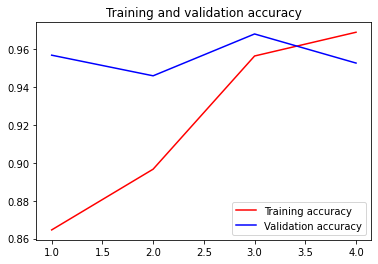

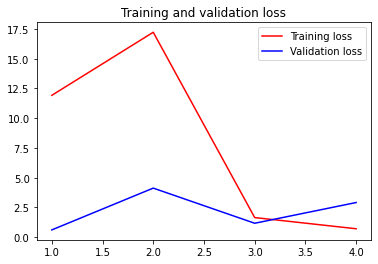

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model.save('vgg19.h5')

## ResNet50

In [ ]:
ResNet = keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
ResNet.trainable = False

In [ ]:
x = layers.Flatten()(ResNet.output)
outputs = layers.Dense(5, activation="sigmoid")(x)
model = keras.Model(ResNet.input, outputs)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[early_stopping])

Epoch 1/10
586/586 [==============================] - 193s 324ms/step - loss: 1.1186 - accuracy: 0.9061 - val_loss: 0.1682 - val_accuracy: 0.9664
Epoch 2/10
586/586 [==============================] - 189s 322ms/step - loss: 0.2473 - accuracy: 0.9695 - val_loss: 0.5109 - val_accuracy: 0.9520
Epoch 3/10
586/586 [==============================] - 189s 322ms/step - loss: 0.3361 - accuracy: 0.9733 - val_loss: 0.2494 - val_accuracy: 0.9747
Epoch 4/10
586/586 [==============================] - 189s 322ms/step - loss: 0.0964 - accuracy: 0.9860 - val_loss: 0.3755 - val_accuracy: 0.9608


In [ ]:
model.save("ResNet50.h5")

## DenseNet 121

In [ ]:
DenseNet = keras.applications.DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(size, size, 3))

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
DenseNet.trainable = False

In [ ]:
x = layers.Flatten()(DenseNet.output)
outputs = layers.Dense(5, activation="sigmoid")(x)
model = keras.Model(DenseNet.input, outputs)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[early_stopping])

Epoch 1/10
586/586 [==============================] - 198s 329ms/step - loss: 13.7767 - accuracy: 0.7536 - val_loss: 3.5777 - val_accuracy: 0.9027
Epoch 2/10
586/586 [==============================] - 190s 324ms/step - loss: 8.0968 - accuracy: 0.8557 - val_loss: 2.8281 - val_accuracy: 0.9253
Epoch 3/10
586/586 [==============================] - 190s 325ms/step - loss: 5.8480 - accuracy: 0.8835 - val_loss: 8.1130 - val_accuracy: 0.8734
Epoch 4/10
586/586 [==============================] - 190s 324ms/step - loss: 7.3342 - accuracy: 0.8830 - val_loss: 3.1315 - val_accuracy: 0.9206
Epoch 5/10
586/586 [==============================] - 190s 325ms/step - loss: 7.1179 - accuracy: 0.8919 - val_loss: 2.4229 - val_accuracy: 0.9320
Epoch 6/10
586/586 [==============================] - 190s 324ms/step - loss: 5.6859 - accuracy: 0.9100 - val_loss: 2.3225 - val_accuracy: 0.9406
Epoch 7/10
586/586 [==============================] - 190s 324ms/step - loss: 4.1581 - accuracy: 0.9172 - val_loss: 19.2400

In [ ]:
model.save("DenseNet121.h5")

# Read and evaluate h5 model

## EfficientNetB7

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/Shareddrives/CS534/efficientb7.h5")

In [ ]:
y_pred = np.argmax(model.predict(test_dataset), axis=1)

79/79 [==============================] - 34s 275ms/step


In [ ]:
print(classification_report(test_dataset.classes, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.99      1.00      1.00       500
           2       0.98      0.82      0.90       500
           3       0.97      1.00      0.98       500
           4       0.87      0.99      0.93       500

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



## VGG16

In [ ]:
model = load_model("/content/drive/Shareddrives/CS534/vgg16.h5")

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

79/79 [==============================] - 21s 268ms/step - loss: 1.4793 - accuracy: 0.9476
Test accuracy: 0.948


In [ ]:
print(model.predict(test_dataset))

79/79 [==============================] - 21s 266ms/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0181941e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]]


In [ ]:
y_pred = np.argmax(model.predict(test_dataset), axis=1)

79/79 [==============================] - 21s 267ms/step


In [ ]:
print(y_pred)

[0 0 0 ... 4 2 4]


In [ ]:
print(classification_report(test_dataset.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       0.79      1.00      0.88       500
           3       1.00      1.00      1.00       500
           4       1.00      0.74      0.85       500

    accuracy                           0.95      2500
   macro avg       0.96      0.95      0.95      2500
weighted avg       0.96      0.95      0.95      2500



## VGG19

In [ ]:
model = load_model("/content/drive/Shareddrives/CS534/vgg19.h5")

In [ ]:
y_pred = np.argmax(model.predict(test_dataset), axis=1)

79/79 [==============================] - 30s 274ms/step


In [ ]:
print(classification_report(test_dataset.classes, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       1.00      0.99      0.99       500
           2       0.95      0.96      0.95       500
           3       0.99      1.00      1.00       500
           4       0.97      0.94      0.96       500

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



## ResNet50

In [ ]:
model = load_model("/content/drive/Shareddrives/CS534/ResNet50.h5")

In [ ]:
y_pred = np.argmax(model.predict(test_dataset), axis=1)

79/79 [==============================] - 22s 272ms/step


In [ ]:
print(classification_report(test_dataset.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       500
           1       0.99      1.00      1.00       500
           2       1.00      0.89      0.94       500
           3       1.00      1.00      1.00       500
           4       0.90      1.00      0.95       500

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



## DenseNet121

In [ ]:
model = load_model("/content/drive/Shareddrives/CS534/DenseNet121.h5")

In [ ]:
y_pred = np.argmax(model.predict(test_dataset), axis=1)

79/79 [==============================] - 24s 272ms/step


In [ ]:
print(classification_report(test_dataset.classes, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       500
           1       1.00      0.69      0.82       500
           2       0.84      0.99      0.91       500
           3       1.00      0.92      0.96       500
           4       0.99      0.83      0.90       500

    accuracy                           0.88      2500
   macro avg       0.91      0.88      0.88      2500
weighted avg       0.91      0.88      0.88      2500

